# Data Science & Business Analytics Intern Nov Batch 2021

# AUTHOR : Attuluri Rohini

The Sparks Foundation GRIP TASK 1

(GRIPNOV21)


TASK 1: Predict the percentage of an student based on the number of study hours using linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [2]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.isna().any()

Hours     False
Scores    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape

(25, 2)

In [8]:
import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

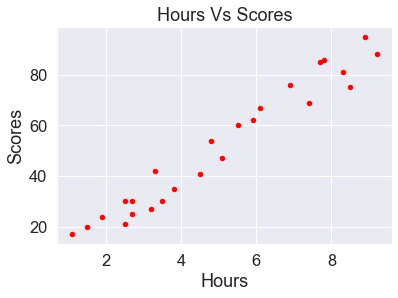

In [9]:
data.plot.scatter(x='Hours',y='Scores',color='Red')
plt.title('Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

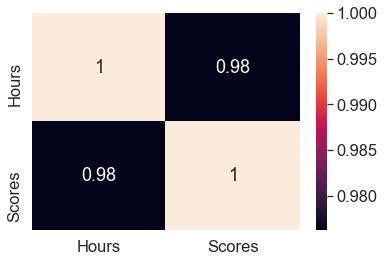

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
data.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'The Regression Line')

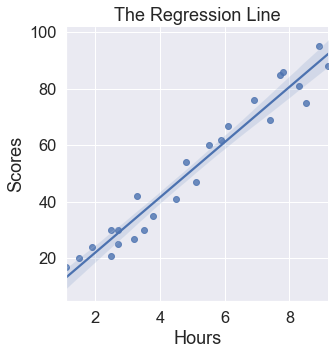

In [12]:
sns.lmplot(x="Hours",y="Scores",data=data)
plt.title('The Regression Line')

In [13]:
#PREPARING THE DATA
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)
lr = LinearRegression()
lr.fit(x,y)
print("Training is completed")

Training is completed


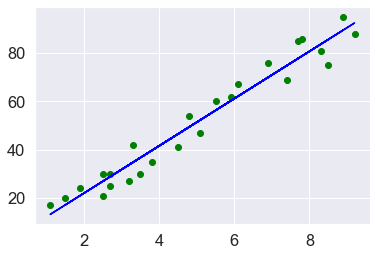

In [18]:
#VISUALIZING THE REGRESSION LINE
line = lr.coef_*x + lr.intercept_
plt.scatter(x,y,color ='green')
plt.plot(x,line,color ='blue')
plt.show()

In [19]:
#PREDICTING AND EVALUATING

In [32]:
#TRAINING_DATA
Y_pred = lr.predict(X_train)

In [21]:
Y_pred

array([69.9367168 , 13.23705714, 52.3402707 , 77.75735951, 34.74382459,
       83.62284155, 92.4210646 , 62.11607409, 36.69898527, 28.87834256,
       56.25059205, 28.87834256, 85.57800223, 26.92318188, 49.40752968,
       89.48832358, 46.47478866])

In [22]:
Y_train

array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

In [23]:
print("\nTraining score :")
print("Mean squared error is: %.2f"% mean_squared_error(Y_train, Y_pred))
print('R2 score is: %2f' % r2_score(Y_train, Y_pred))


Training score :
Mean squared error is: 31.68
R2 score is: 0.948495


In [24]:
#TESTING DATA

In [33]:
Y_pred_2 = lr.predict(x_test)

In [26]:
Y_pred_2

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341,
       39.63172629, 21.05769985, 78.73493985])

In [27]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

In [28]:
print("\nTesting score :")
print("Mean squared error is: %.2f"% mean_squared_error(y_test, Y_pred_2))
print('R2 score is: %2f' % r2_score(y_test, Y_pred_2))


Testing score :
Mean squared error is: 22.95
R2 score is: 0.956853


In [29]:
#COMPARING ACTUAL AND PREDICTED

In [30]:
data1 = pd.DataFrame({'Actual': y_test,'predicted': Y_pred_2})
data1

,Actual,predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913
5,35,39.631726
6,24,21.057700
7,86,78.734940


In [31]:
#Testing an example

Hours = np.array([[8]])
predictions=lr.predict(Hours)
print("No of Hours = {}".format(Hours))
print("predicted score = {}".format(predictions[0]))


No of Hours = [[8]]
predicted score = 80.69010053167295
